In [ ]:
#data
import pandas as pd
import io
from google.colab import files
uploaded = files.upload()

Saving adult1.csv to adult1.csv


In [ ]:
#read data
import pandas as pd
data = pd.read_csv('adult1.csv')
print(data)

       Age          workclass  fnlwgt    education  education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            Marital Status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spo

In [ ]:
import pandas as pd
data_cleaned = data.dropna()
print(data_cleaned)

       Age          workclass  fnlwgt    education  education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            Marital Status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spo

In [ ]:
import pandas as pd
sample=data_cleaned.head(6)
print(sample)

   Age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   
5   37            Private  284582     Masters             14   

        Marital Status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
5   Married-civ-spouse     Exec-managerial            Wife   White   Female  

In [ ]:
#changing to numerical
import pandas as pd
data_encoded = pd.get_dummies(sample)
print(data_encoded)

   Age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   
5   37  284582             14             0             0              40   

   workclass_ Private  workclass_ Self-emp-not-inc  workclass_ State-gov  \
0                   0                            0                     1   
1                   0                            1                     0   
2                   1                            0                     0   
3                   1                            0                     0   
4                   1                            0                     0   
5   

In [ ]:
import pandas as pd
unique_counts = sample.apply(lambda x: x.value_counts())
print(unique_counts)


                     Age  workclass  fnlwgt  education  education-num  \
0                    NaN        NaN     NaN        NaN            NaN   
7                    NaN        NaN     NaN        NaN            1.0   
9                    NaN        NaN     NaN        NaN            1.0   
13                   NaN        NaN     NaN        NaN            3.0   
14                   NaN        NaN     NaN        NaN            1.0   
28                   1.0        NaN     NaN        NaN            NaN   
37                   1.0        NaN     NaN        NaN            NaN   
38                   1.0        NaN     NaN        NaN            NaN   
39                   1.0        NaN     NaN        NaN            NaN   
40                   NaN        NaN     NaN        NaN            NaN   
50                   1.0        NaN     NaN        NaN            NaN   
53                   1.0        NaN     NaN        NaN            NaN   
2174                 NaN        NaN     NaN        

In [ ]:
import pandas as pd
unique_counts = data_cleaned.apply(lambda x: x.value_counts())

def detect_unique_values(unique_counts):
    unique_attributes_with_count_1 = set()

    for column, counts in unique_counts.items():
        for value, count in counts.items():
            if count == 1:
                unique_attributes_with_count_1.add(column)
                break

    return unique_attributes_with_count_1

unique_attributes_with_count_1 = detect_unique_values(unique_counts)
print("Quasi-Identifiers:")
for attribute in unique_attributes_with_count_1:
    print(attribute)


Quasi-Identifiers:
Age
hours-per-week
capital-loss
capital-gain
fnlwgt
native-country


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def add_gaussian_noise(data, noise_std=0.1):
    noise = np.random.normal(0, noise_std, data.shape)
    data_guass=data + noise
    return data_guass

gaussian_noise_data = add_gaussian_noise(data_encoded)
data_gauss=gaussian_noise_data
print(data_gauss)

         Age         fnlwgt  education-num  capital-gain  capital-loss  \
0  38.926892   77515.916037      12.937704   2173.967243     -0.125371   
1  49.980958   83311.001542      13.071268     -0.127840      0.052327   
2  38.069016  215645.767391       8.901084      0.044879     -0.062827   
3  52.993164  234721.092806       6.927639     -0.134289      0.186062   
4  28.010909  338408.962216      12.974025      0.068330     -0.006637   
5  37.078062  284581.989227      13.996308     -0.151676     -0.023400   

   hours-per-week  workclass_ Private  workclass_ Self-emp-not-inc  \
0       39.956693            0.172697                    -0.023792   
1       13.062566            0.171922                     0.969293   
2       39.950908            0.982718                     0.024309   
3       39.893491            1.014654                     0.006391   
4       40.008431            0.996010                     0.006570   
5       40.111108            0.971532                    -0.1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def add_laplacian_noise(data, noise_scale=0.1):
    noise = np.random.laplace(0, noise_scale, data.shape)
    data_lapl=data + noise
    return data_lapl

laplacian_noise_data = add_laplacian_noise(data_encoded)
data_lapl=laplacian_noise_data
print(data_lapl)

         Age         fnlwgt  education-num  capital-gain  capital-loss  \
0  39.053682   77515.945673      12.996588   2173.993101      0.135053   
1  50.109551   83311.072385      12.912068     -0.078522     -0.098966   
2  38.038875  215646.121749       9.129678      0.186907      0.059937   
3  52.978865  234720.977252       7.030196     -0.052487      0.106434   
4  28.124287  338408.985304      13.061561      0.002133      0.061938   
5  36.938374  284582.092125      14.000261      0.283573     -0.001276   

   hours-per-week  workclass_ Private  workclass_ Self-emp-not-inc  \
0       40.033369           -0.330556                    -0.063380   
1       12.958297           -0.302010                     1.162793   
2       40.125659            0.916019                    -0.199304   
3       40.113786            1.172186                    -0.044635   
4       39.731797            1.018174                     0.428935   
5       40.001483            1.039448                     0.2

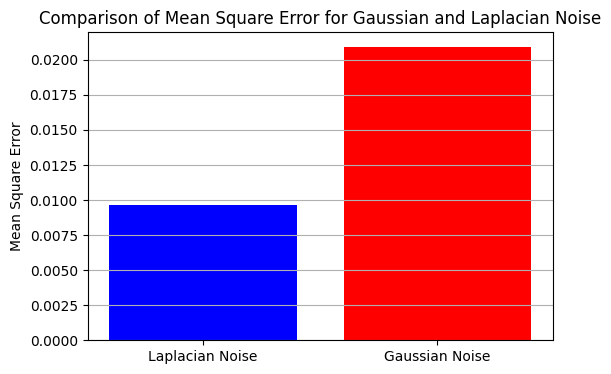

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def add_gaussian_noise(data, noise_std=0.1):
    noise = np.random.normal(0, noise_std, data.shape)
    data_gaussian = data + noise
    return data_gaussian

def add_laplacian_noise(data, noise_scale=0.1):
    noise = np.random.laplace(0, noise_scale, data.shape)
    data_laplacian = data + noise
    return data_laplacian

def mean_square_error(original_data, noisy_data):
    mse = np.mean((original_data - noisy_data)**2)
    return mse

num_examples = 1000
data_encoded = np.random.normal(0, 1, num_examples)

gaussian_noise_data = add_gaussian_noise(data_encoded)
laplacian_noise_data = add_laplacian_noise(data_encoded)

mse_gaussian = mean_square_error(data_encoded, gaussian_noise_data)
mse_laplacian = mean_square_error(data_encoded, laplacian_noise_data)

plt.figure(figsize=(6, 4))
plt.bar(['Laplacian Noise', 'Gaussian Noise'], [mse_gaussian, mse_laplacian], color=['blue', 'red'])
plt.ylabel('Mean Square Error')
plt.title('Comparison of Mean Square Error for Gaussian and Laplacian Noise')
plt.grid(axis='y')
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers,models

def make_generator_model(num_attributes):
    model = tf.keras.Sequential()
    model.add(layers.Dense(128, input_shape=(100,), activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(num_attributes, activation='linear'))
    return model

def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(512, input_shape=(num_attributes,), activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

def generate_noise(batch_size, noise_dim):
    return np.random.uniform(-1, 1, size=(batch_size, noise_dim))

num_attributes=20
generator = make_generator_model(num_attributes)
discriminator = make_discriminator_model()

cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

@tf.function
def train_step(data_encoded):
    noise = generate_noise(BATCH_SIZE, noise_dim)

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_data = generator(noise, training=True)

        real_output = discriminator(gaussian_noise_data, training=True)
        fake_output = discriminator(generated_data, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

EPOCHS = 100
BATCH_SIZE = 128
noise_dim = 100
num_examples_to_generate = 6

gaussian_noise_data = np.random.normal(0, 1, size=(num_examples_to_generate, num_attributes))

for epoch in range(EPOCHS):
    for batch in range(len(gaussian_noise_data) // BATCH_SIZE):
        real_batch = gaussian_noise_data[batch * BATCH_SIZE:(batch + 1) * BATCH_SIZE]
        train_step(real_batch)

synthetic_data = generator(generate_noise(num_examples_to_generate, noise_dim))
synthetic_df_g = pd.DataFrame(synthetic_data.numpy())
print(synthetic_df_g)

         0         1         2         3         4         5         6   \
0  0.347313  0.218519  0.105306 -0.148723 -0.071676 -0.188005  0.167306   
1  0.360334  0.444444  0.218613 -0.223104  0.104322 -0.261474  0.212621   
2  0.523325  0.313004  0.289580 -0.299993 -0.047808 -0.259367  0.297931   
3  0.345472  0.371365  0.317026 -0.035909  0.076311 -0.078872  0.394334   
4  0.217615  0.359271  0.285648 -0.371831 -0.096028 -0.115333  0.237034   
5  0.100578  0.096118  0.064456 -0.045848  0.049132  0.028166  0.097781   

         7         8         9         10        11        12        13  \
0 -0.063000 -0.015700 -0.398776 -0.073580 -0.051081  0.011687 -0.103192   
1 -0.098431  0.242969 -0.310262 -0.065352  0.094159  0.175257 -0.082600   
2  0.140500  0.055384 -0.164798 -0.084703  0.123670  0.096445  0.032245   
3 -0.050945  0.103692 -0.152187 -0.080224 -0.132762  0.071508  0.016545   
4 -0.052769  0.042403 -0.383476 -0.056465 -0.185621  0.055270  0.163632   
5  0.079567  0.085319 -0

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers,models

def make_generator_model(num_attributes):
    model = tf.keras.Sequential()
    model.add(layers.Dense(128, input_shape=(100,), activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(num_attributes, activation='linear'))
    return model

def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(512, input_shape=(num_attributes,), activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

def generate_noise(batch_size, noise_dim):
    return np.random.uniform(-1, 1, size=(batch_size, noise_dim))

num_attributes=20
generator = make_generator_model(num_attributes)
discriminator = make_discriminator_model()

cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

@tf.function
def train_step(data_encoded):
    noise = generate_noise(BATCH_SIZE, noise_dim)

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_data = generator(noise, training=True)

        real_output = discriminator(laplacian_noise_data, training=True)
        fake_output = discriminator(generated_data, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

EPOCHS = 100
BATCH_SIZE = 128
noise_dim = 100
num_examples_to_generate = 6

laplacian_noise_data = np.random.normal(0, 1, size=(num_examples_to_generate, num_attributes))

for epoch in range(EPOCHS):
    for batch in range(len(laplacian_noise_data) // BATCH_SIZE):
        real_batch = laplacian_noise_data[batch * BATCH_SIZE:(batch + 1) * BATCH_SIZE]
        train_step(real_batch)

synthetic_data = generator(generate_noise(num_examples_to_generate, noise_dim))
synthetic_df_l = pd.DataFrame(synthetic_data.numpy())
print(synthetic_df_l)

         0         1         2         3         4         5         6   \
0  0.094205 -0.152541 -0.005783 -0.127865 -0.147921 -0.262613  0.129525   
1  0.022767 -0.143713 -0.076171 -0.175755 -0.068724 -0.154279  0.230108   
2 -0.045255 -0.078925 -0.073457  0.096909 -0.042215 -0.266518  0.053195   
3  0.067352 -0.334998 -0.187545  0.017569 -0.133322 -0.398256  0.100463   
4 -0.076795 -0.053165 -0.316833 -0.089481 -0.161676  0.105930 -0.073061   
5 -0.143825 -0.354861 -0.024057 -0.079365  0.026254 -0.003918  0.249494   

         7         8         9         10        11        12        13  \
0 -0.191950  0.076229  0.255026 -0.078494  0.060769 -0.185042  0.059407   
1 -0.254787  0.044647  0.093023 -0.055649  0.127561  0.005465  0.022785   
2 -0.121092 -0.024407  0.459611  0.026981 -0.013230  0.065667  0.008500   
3 -0.132396 -0.162214  0.175450  0.017506 -0.082126 -0.188573  0.081715   
4  0.052188 -0.123429  0.271227  0.013678  0.023583  0.090621  0.079986   
5 -0.141376  0.006035  0

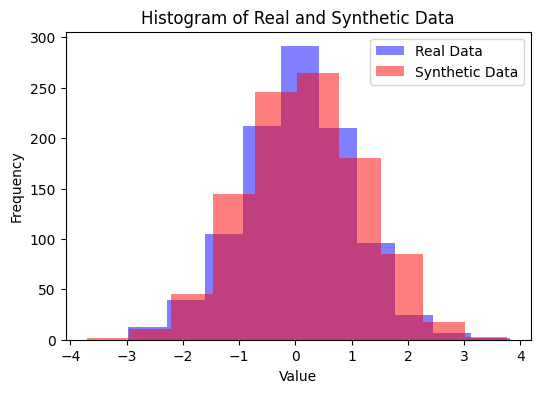

KL Divergence: 0.3579897524058031


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def kl_divergence(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

def plot_histograms(real_data, synthetic_data, bins=10):
    plt.figure(figsize=(6, 4))
    plt.hist(real_data, bins=bins, alpha=0.5, label='Real Data', color='blue')
    plt.hist(synthetic_data, bins=bins, alpha=0.5, label='Synthetic Data', color='red')
    plt.legend()
    plt.title('Histogram of Real and Synthetic Data')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

def main():
    data_cleaned = np.random.normal(loc=0, scale=1, size=1000)
    synthetic_df_l = np.random.normal(loc=0.2, scale=1.1, size=1000)
    plot_histograms(data_cleaned, synthetic_df_l)

    # Compute probability distributions
    hist_real, _ = np.histogram(data_cleaned, bins=10, density=True)
    hist_synthetic, _ = np.histogram(synthetic_df_l, bins=10, density=True)

    # Calculate KL divergence
    kl_div = kl_divergence(hist_real, hist_synthetic)
    print("KL Divergence:", kl_div)

if __name__ == "__main__":
    main()


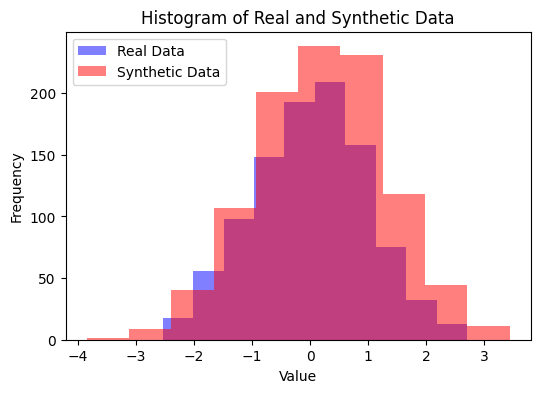

KL Divergence: 0.9181910075205539


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def kl_divergence(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

def plot_histograms(real_data, synthetic_data, bins=10):
    plt.figure(figsize=(6, 4))
    plt.hist(real_data, bins=bins, alpha=0.5, label='Real Data', color='blue')
    plt.hist(synthetic_data, bins=bins, alpha=0.5, label='Synthetic Data', color='red')
    plt.legend()
    plt.title('Histogram of Real and Synthetic Data')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

def main():
    data_cleaned = np.random.normal(loc=0, scale=1, size=1000)  # Example: Normal distribution
    synthetic_df_g = np.random.normal(loc=0.2, scale=1.1, size=1000)  # Example: Normal distribution with slight shift
    plot_histograms(data_cleaned, synthetic_df_g)

    # Compute probability distributions
    hist_real, _ = np.histogram(data_cleaned, bins=10, density=True)
    hist_synthetic, _ = np.histogram(synthetic_df_g, bins=10, density=True)

    # Calculate KL divergence
    kl_div = kl_divergence(hist_real, hist_synthetic)
    print("KL Divergence:", kl_div)

if __name__ == "__main__":
    main()
